In [3]:
import pandas as pd
import numpy as np
import Higgs
from Higgs import predictions as HP
from Higgs import bounds as HB
from Higgs.tools.ImplementationUtils import implementPairProductionLimit, fromHB5Table2
import os, sys
import matplotlib.pyplot as plt

sys.path.insert(0, os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd()))))
import MassResolutions as resolution


# LEP `ee -> H+ H- -> taunu taunu` [1301.6065](https://arxiv.org/abs/1301.6065)

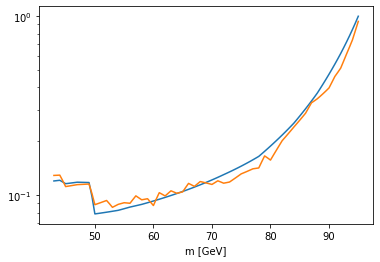

Looks good. Saving this to nonres_LEP_LEPComb_3.json


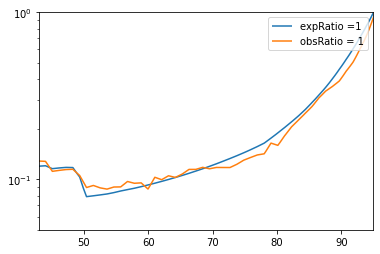

In [13]:
df2 = fromHB5Table2("6065_LEP_HpHm_fig4", "LEP", p1Name="", p2Name="br_taunu")
df = df2.loc[df2.mbr_taunu==1].reset_index(drop=True)
del df["mbr_taunu"]

process = {"firstDecay": ["taunu"], "secondDecay": ["taunu"]}
limitFile = implementPairProductionLimit(
    1216295,
    process,
    "Fig 4(top-left)",
    df,
    idSuffix=2,
    luminosity=2.6,
    massResolution=resolution.LEPZH,  # certainly not better
)

lim = HB.Limit(limitFile)
pred = Higgs.Predictions()
hp = pred.addParticle(HP.ChargedScalar("h+"))
hp.setDecayWidth("taunu", 1.0)


def testAgainstLimit(mass, rate):
    hp.setMass(mass)
    hp.setNormalizedCxn("LEP", "pair", rate)
    app = lim.apply(pred)
    if len(app) == 0:
        print("Limit not applied for ", mass, rate)
        return (0, 0)
    return (app[0].expRatio(), app[0].obsRatio())


hm = np.linspace(43, 95)
r = np.linspace(5e-2, 1)
test = np.frompyfunc(testAgainstLimit, 2, 2)
expR, obsR = test(*np.meshgrid(hm, r))
plt.figure()
plt.yscale("log")
plt.contour(hm, r, expR, levels=[1], colors=["C0"]).collections[0].set_label(
    "expRatio =1 "
)
plt.contour(hm, r, obsR, levels=[1], colors=["C1"]).collections[0].set_label(
    "obsRatio = 1"
)
plt.legend()
plt.show()
